In [7]:
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 8)
%matplotlib inline  

In [8]:
df = pd.read_csv('cleaned_sales+weather_data.csv')
df = df.drop('Unnamed: 0' , 1)

In [9]:
df['date'] = df['date'].map( lambda x: datetime.strptime( x, '%Y-%m-%d'))
df['weekofyear'] = df['date'].dt.weekofyear
df['month'] = df['date'].dt.month

In [10]:
df['weekday'] = df['date'].dt.weekday
df['dayofyear'] = df['date'].dt.dayofyear

In [11]:
# filter
df = df[df['oms'] > 0 ]
df[:10]

,EAN,Produkttekst,avance,chain_store,date,oms,postal_no,store_name,store_no,volume,station,temp,wind,sun,precipitations,weekofyear,month,weekday,dayofyear
0,5741000116975,Royal B X-mas 6x33ds,1,DagliBrugsen,2015-01-01,31.00,2300,COOP DAGLIBR BRYDES ALLE,1043,1,618800,5.5,6.1,0,1.9,1,1,3,1
1,5741000131084,Royal Export 6x33 ds,-13,DagliBrugsen,2015-01-01,100.00,2300,COOP DAGLIBR BRYDES ALLE,1043,4,618800,5.5,6.1,0,1.9,1,1,3,1
2,5741000140284,ROYAL PLATINUM 6-PAK,8,DagliBrugsen,2015-01-01,39.95,2300,COOP DAGLIBR BRYDES ALLE,1043,1,618800,5.5,6.1,0,1.9,1,1,3,1
3,5741000131084,Royal Export 6x33 ds,17,DagliBrugsen,2015-01-01,79.90,2400,COOP DAGLIBR BISPEPARKEN,1053,2,618800,5.5,6.1,0,1.9,1,1,3,1
4,5741000132463,Royal Exp. kuffert24,-19,DagliBrugsen,2015-01-01,299.85,2650,COOP LOKALBR FJELDSTEDVEJ,1082,3,618800,5.5,6.1,0,1.9,1,1,3,1
5,5741000116494,Royal Class. 6x33 ds,10,DagliBrugsen,2015-01-01,40.95,2500,COOP LOKALBR HERMAN BANGS PLAD,1134,1,618800,5.5,6.1,0,1.9,1,1,3,1
6,5741000117958,Royal Plsnr 6x33 ds,10,DagliBrugsen,2015-01-01,40.95,2500,COOP LOKALBR HERMAN BANGS PLAD,1134,1,618800,5.5,6.1,0,1.9,1,1,3,1
7,5741000131077,Royal Export ds,7,DagliBrugsen,2015-01-01,24.00,2500,COOP LOKALBR HERMAN BANGS PLAD,1134,2,618800,5.5,6.1,0,1.9,1,1,3,1
8,5741000132463,Royal Exp. kuffert24,-13,DagliBrugsen,2015-01-01,199.90,2610,COOP DAGLIBRUGSEN ISLEV TORV,1194,2,618800,5.5,6.1,0,1.9,1,1,3,1
9,5741000135013,HEINEKEN KUFFERT,-13,DagliBrugsen,2015-01-01,199.90,2610,COOP DAGLIBRUGSEN ISLEV TORV,1194,2,618800,5.5,6.1,0,1.9,1,1,3,1


## aggregate with weather data

In [ ]:
df_weather = pd.read_csv('')

## Value / month

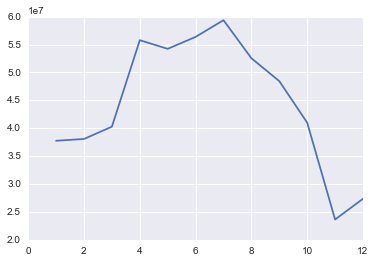

In [23]:
agg_month_value = df.groupby('month')['oms'].sum()
plt.plot(agg_month_value.index.values , agg_month_value.values )
plt.show()

## Value / week

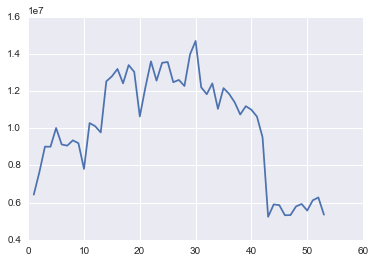

In [24]:
agg_week_value = df.groupby('weekofyear')['oms'].sum()
plt.plot(agg_week_value.index.values , agg_week_value.values )
plt.show()

## value / week day

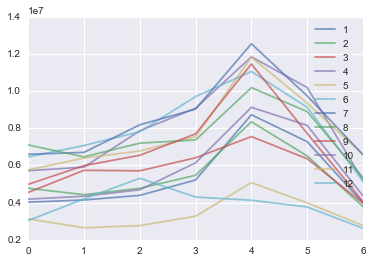

In [25]:
for m in set(df['month']):
    x = df[ df['month'] == m ]
    agg = x.groupby('weekday')['oms'].sum()
    plt.plot(agg.index.values , agg.values , label=m, alpha=0.7)
plt.legend()
plt.show()

## postal code

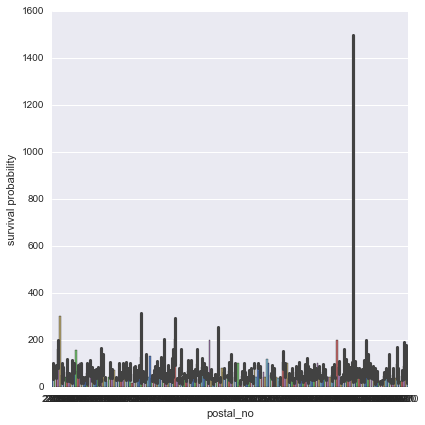

In [10]:
# Draw a nested barplot to show survival for class and sex
g = sns.factorplot(x="postal_no", y="oms", data=df[:1000],
                   size=6, kind="bar", palette="muted") #, hue="sex"
g.despine(left=True)
g.set_ylabels("survival probability")

## values distributions

In [15]:
df[df['oms'] < 0  ]

,EAN,Produkttekst,avance,chain_store,date,oms,postal_no,store_name,store_no,volume,weekofyear,month,weekday,dayofyear
3874,5741000111840,Royal Pilsner 33 cl,-4,DagliBrugsen,2015-01-02,-46.70,4850,DAGLIBRUGSEN STUBBEKØBING,4262,0,1,1,4,2
4580,5741000133491,ROYAL CLASSIC,-18,DagliBrugsen,2015-01-02,-39.75,9510,DAGLIBRUGSEN ASTRUP ARDEN,7008,-5,1,1,4,2
4581,5741000133613,X-MAS HVID 33 CL FL,0,DagliBrugsen,2015-01-02,-24.72,9510,DAGLIBRUGSEN ASTRUP ARDEN,7008,-6,1,1,4,2
4582,5741000133620,X-MAS BLÅ 33 CL FL,0,DagliBrugsen,2015-01-02,-24.72,9510,DAGLIBRUGSEN ASTRUP ARDEN,7008,-6,1,1,4,2
7498,5741000125038,Royal Stout 6x33 ds,-1,Irma,2015-01-02,-4.00,2100,IRMA ØSTERBROGADE 52,23052,0,1,1,4,2
8617,5741000115435,Royal Plsnr 33 ds,-5,SuperBrugsen,2015-01-02,-17.60,4030,SUPERBRUGSEN TUNE,1946,-2,1,1,4,2
8681,5741000133491,ROYAL CLASSIC,-5,SuperBrugsen,2015-01-02,-37.53,8963,SUPERBRUGSEN AUNING,2117,-9,1,1,4,2
8719,5741000132463,Royal Exp. kuffert24,-3,SuperBrugsen,2015-01-02,-219.90,8450,SUPERBRUGSEN HAMMEL,2364,-2,1,1,4,2
8721,5741000135013,HEINEKEN KUFFERT,-2,SuperBrugsen,2015-01-02,-30.00,8450,SUPERBRUGSEN HAMMEL,2364,0,1,1,4,2
9039,5741000133453,ROYAL PILSNER 33 CL,-6,SuperBrugsen,2015-01-02,-69.84,7000,SUPERBRUGSEN ERRITSØ,3135,-24,1,1,4,2
